In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/coronavirusdataset/time.csv
/kaggle/input/coronavirusdataset/patient.csv
/kaggle/input/coronavirusdataset/route.csv


<h3> Understanding the data

In [2]:
patient = pd.read_csv('/kaggle/input/coronavirusdataset/patient.csv')

In [3]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 14 columns):
id                  5328 non-null int64
sex                 383 non-null object
birth_year          370 non-null float64
country             5328 non-null object
region              371 non-null object
group               81 non-null object
infection_reason    140 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      47 non-null float64
confirmed_date      5328 non-null object
released_date       32 non-null object
deceased_date       20 non-null object
state               5328 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 582.9+ KB


In [4]:
patient.isnull().sum()

id                     0
sex                 4945
birth_year          4958
country                0
region              4957
group               5247
infection_reason    5188
infection_order     5293
infected_by         5258
contact_number      5281
confirmed_date         0
released_date       5296
deceased_date       5308
state                  0
dtype: int64

As we can see , our dataset is loaded with null values. Now let's have a peek and see what we can understand from our dataset.


In [5]:
patient.head(10)

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
5,6,male,1964.0,Korea,capital area,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaN,released
6,7,male,1991.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,9.0,2020-01-30,2020-02-15,NaN,released
7,8,female,1957.0,Korea,Jeollabuk-do,NaN,visit to Wuhan,1.0,NaN,113.0,2020-01-31,2020-02-12,NaN,released
8,9,female,1992.0,Korea,capital area,NaN,contact with patient,2.0,5.0,2.0,2020-01-31,2020-02-24,NaN,released
9,10,female,1966.0,Korea,capital area,NaN,contact with patient,3.0,6.0,43.0,2020-01-31,2020-02-19,NaN,released


In [6]:
patient.tail(10)

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
5318,5319,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5319,5320,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5320,5321,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5321,5322,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5322,5323,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5323,5324,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5324,5325,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5325,5326,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5326,5327,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5327,5328,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated


<H3>Data Visualization</H3>

Text(0.5, 1.0, 'Regions affected Overall')

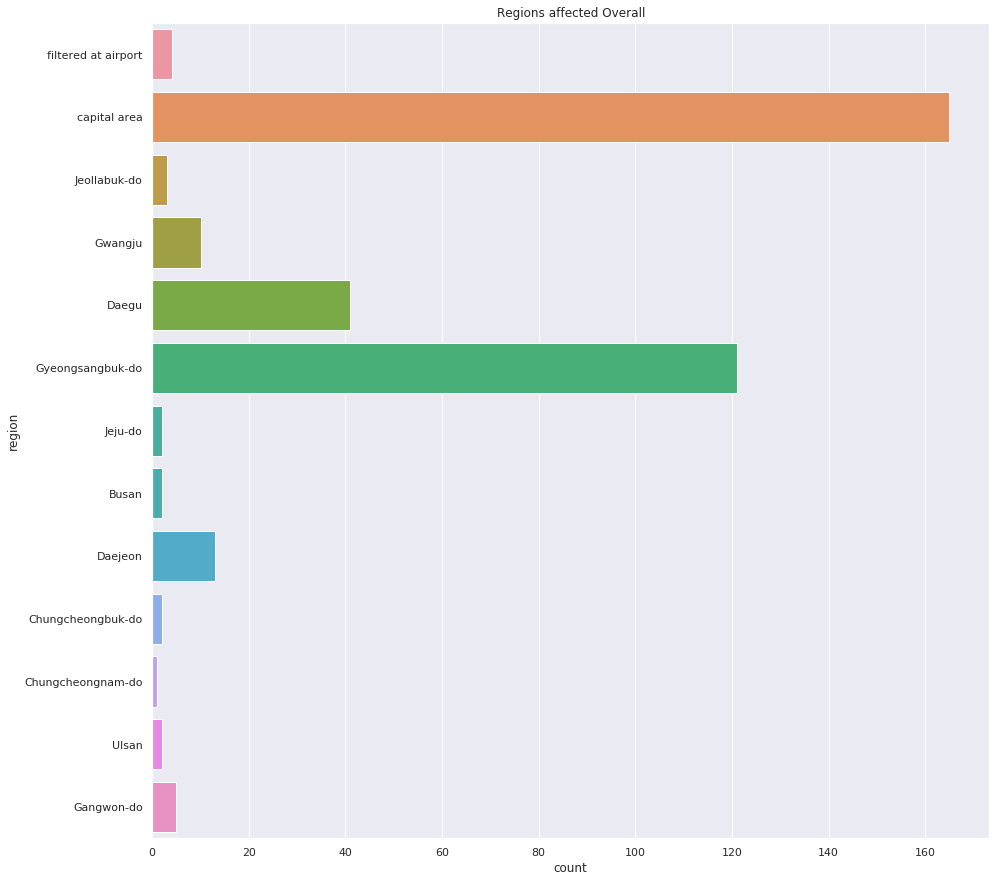

In [7]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(
    y=patient['region'],

).set_title('Regions affected Overall')

In [8]:
reason = [x for x in patient['infection_reason'].unique()]
size = [len((patient['infection_reason'].loc[patient['infection_reason']==reason])) for reason in reason]

Another form of visualization to see the reason how people got infected.

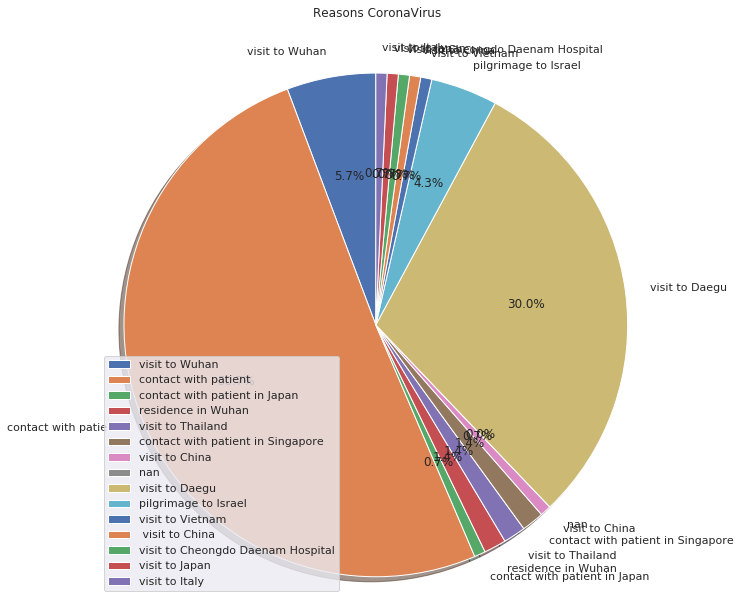

In [9]:
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(size,labels=reason, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend()
ax1.set_title('Reasons CoronaVirus\n\n')
plt.show()

We see that majority of them got infected by ,  
* Contact with a patient
* Visit to Daegu
* Visit to Wuhan

Let's see the number of people who had contact with a cv+ patient's ,and see how are they doing.


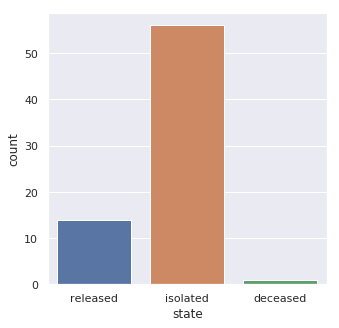

In [10]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=patient['state'].loc[
    (patient['infection_reason']=='contact with patient')
])

We can see that : - 
* Majority of them are in an isolated state
* About 12 of them were released
* Few of them are deceased.

Let's go more deeper and understand the spread based on 
* Each country
* Sex
* Confirmed Cases

In [11]:
patient['country'].unique()

array(['China', 'Korea', 'Mongolia'], dtype=object)

<h3>Understanding the spread of the virus in China<h3>

In [12]:
patient['age'] = 2020-patient['birth_year']

Text(0.5, 1.0, 'Affected population , By gender')

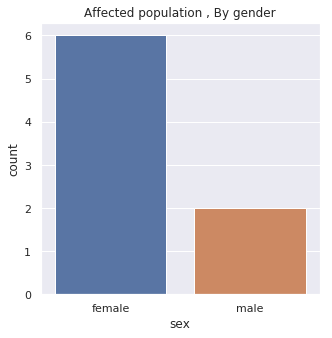

In [13]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=patient['sex'].loc[(patient['country']=="China")]).set_title('Affected population , By gender')

Text(0.5, 1.0, 'Female state in china')

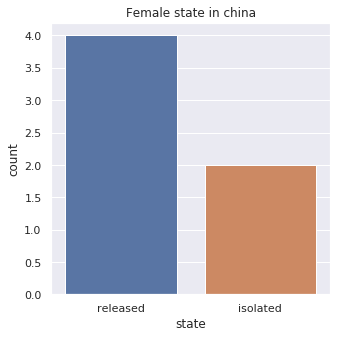

In [14]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=patient['state'].loc[(patient['country']=="China") &
                                    (patient['sex']=="female")]).set_title('Female state in china')

Text(0.5, 1.0, 'Male state in china')

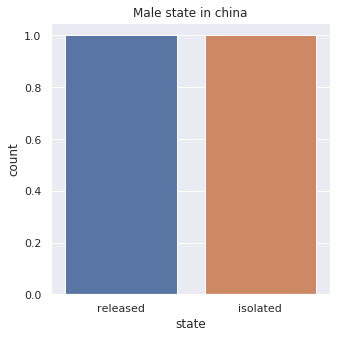

In [15]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=patient['state'].loc[(patient['country']=="China") &
                                    (patient['sex']=="male")]).set_title('Male state in china')

Text(0.5, 1.0, 'Distribution plot for year , Females in China')

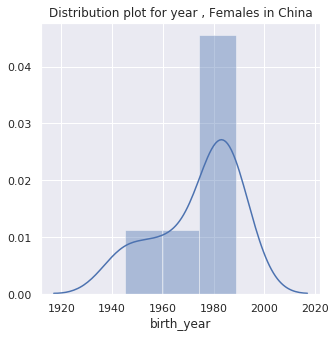

In [16]:
sns.distplot(patient['birth_year'].loc[
    (patient['country']=="China") &
    (patient['sex']=="female")
    
]).set_title("Distribution plot for year , Females in China")

Text(0.5, 1.0, 'Distribution plot for birth year , Males in China')

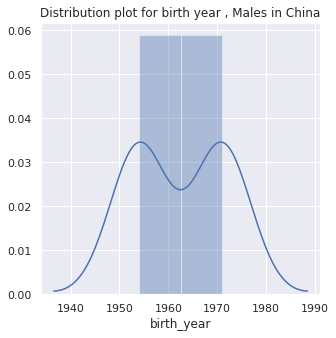

In [17]:
sns.distplot(patient['birth_year'].loc[
    (patient['country']=="China") &
    (patient['sex']=="male")
    
]).set_title('Distribution plot for birth year , Males in China')

Text(0.5, 1.0, 'Distribution plot for age , Males in China')

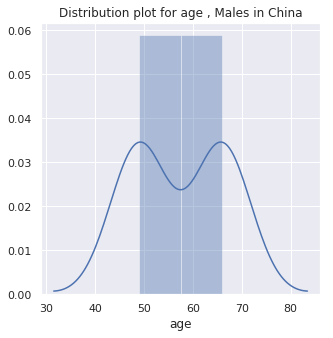

In [18]:
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(patient['age'].loc[
    (patient['country']=="China") &
    (patient['sex']=="male")
    
]).set_title('Distribution plot for age , Males in China')

Text(0.5, 1.0, 'Distribution plot for age , Females in China')

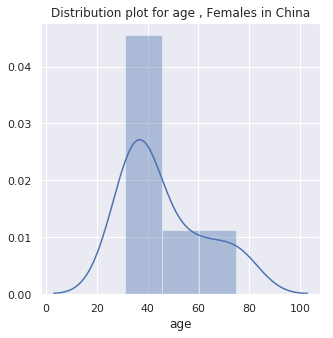

In [19]:
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(patient['age'].loc[
    (patient['country']=="China") &
    (patient['sex']=="female")
    
]).set_title('Distribution plot for age , Females in China')

Text(0.5, 1.0, 'Regions in china where the patient got affected')

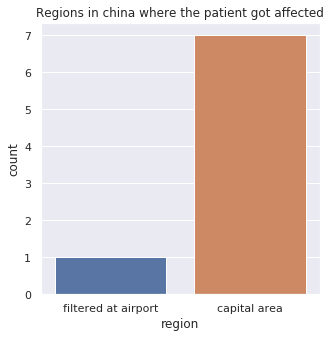

In [20]:
sns.countplot(
    patient['region'].loc[
        (patient['country']=="China") 
    ]
).set_title('Regions in china where the patient got affected')

Text(0.5, 1.0, 'Confirmed dates in China')

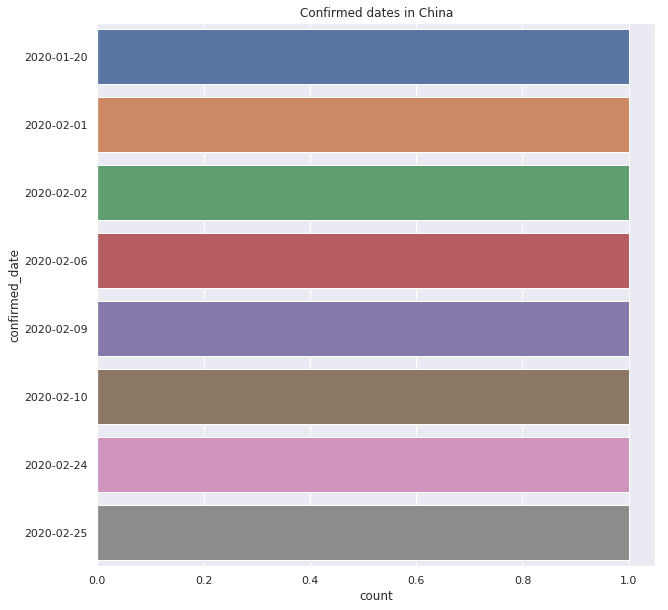

In [21]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(
    y = patient['confirmed_date'].loc[
        (patient['country']=="China")
    ]

).set_title('Confirmed dates in China')

We see that there are very few cases in China.

Now let's take a look at Korea and see what we can find out.

<h3>Understanding the spread of the virus in Korea<h3>

Text(0.5, 1.0, 'Affected population , By gender in Korea')

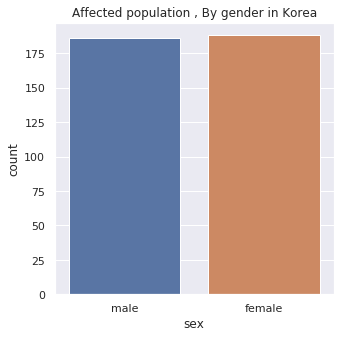

In [22]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=patient['sex'].loc[(patient['country']=="Korea")]).set_title('Affected population , By gender in Korea')

Text(0.5, 1.0, 'Female state in Korea')

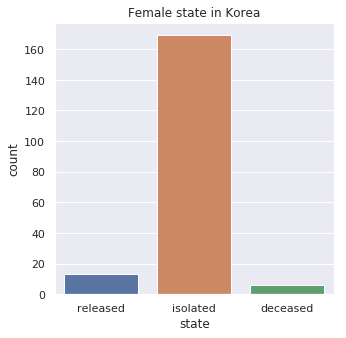

In [23]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=patient['state'].loc[(patient['country']=="Korea") &
                                    (patient['sex']=="female")]).set_title('Female state in Korea')

Text(0.5, 1.0, 'Male state in Korea')

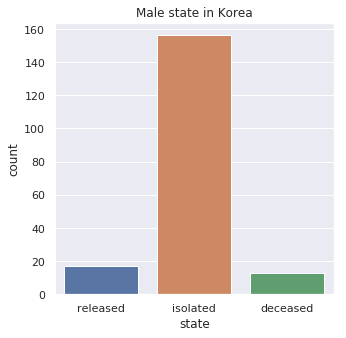

In [24]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=patient['state'].loc[(patient['country']=="Korea") &
                                    (patient['sex']=="male")]).set_title('Male state in Korea')

<h3>Distribution plot for birth year in Korea

Text(0.5, 1.0, 'Distribution plot for age , Females in Korea')

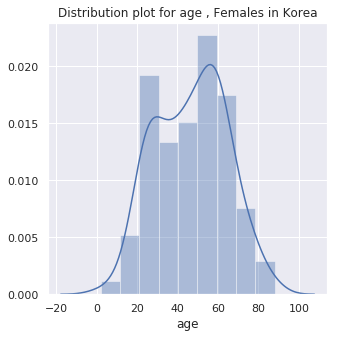

In [25]:
sns.distplot(patient['age'].loc[
    (patient['country']=="Korea") &
    (patient['sex']=="female")
    
]).set_title("Distribution plot for age , Females in Korea")

Text(0.5, 1.0, 'Distribution plot for year , Females in Korea')

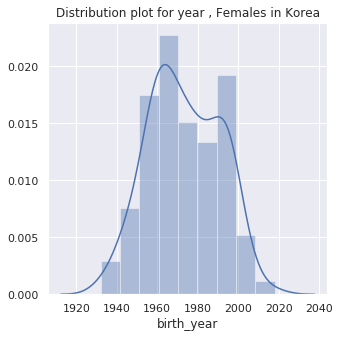

In [26]:
sns.distplot(patient['birth_year'].loc[
    (patient['country']=="Korea") &
    (patient['sex']=="female")
    
]).set_title("Distribution plot for year , Females in Korea")

Text(0.5, 1.0, 'Distribution plot for age , Males in Korea')

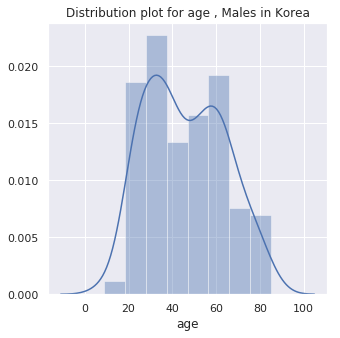

In [27]:
sns.distplot(patient['age'].loc[
    (patient['country']=="Korea") &
    (patient['sex']=="male")
    
]).set_title("Distribution plot for age , Males in Korea")

Text(0.5, 1.0, 'Distribution plot for birth year , Males in Korea')

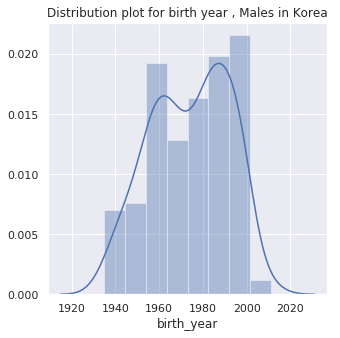

In [28]:
sns.distplot(patient['birth_year'].loc[
    (patient['country']=="Korea") &
    (patient['sex']=="male")
    
]).set_title('Distribution plot for birth year , Males in Korea')

The average age of both male and female who got affected is in the range of 30-60

<h3>Regions affected in Korea

Text(0.5, 1.0, 'Regions affected in Korea')

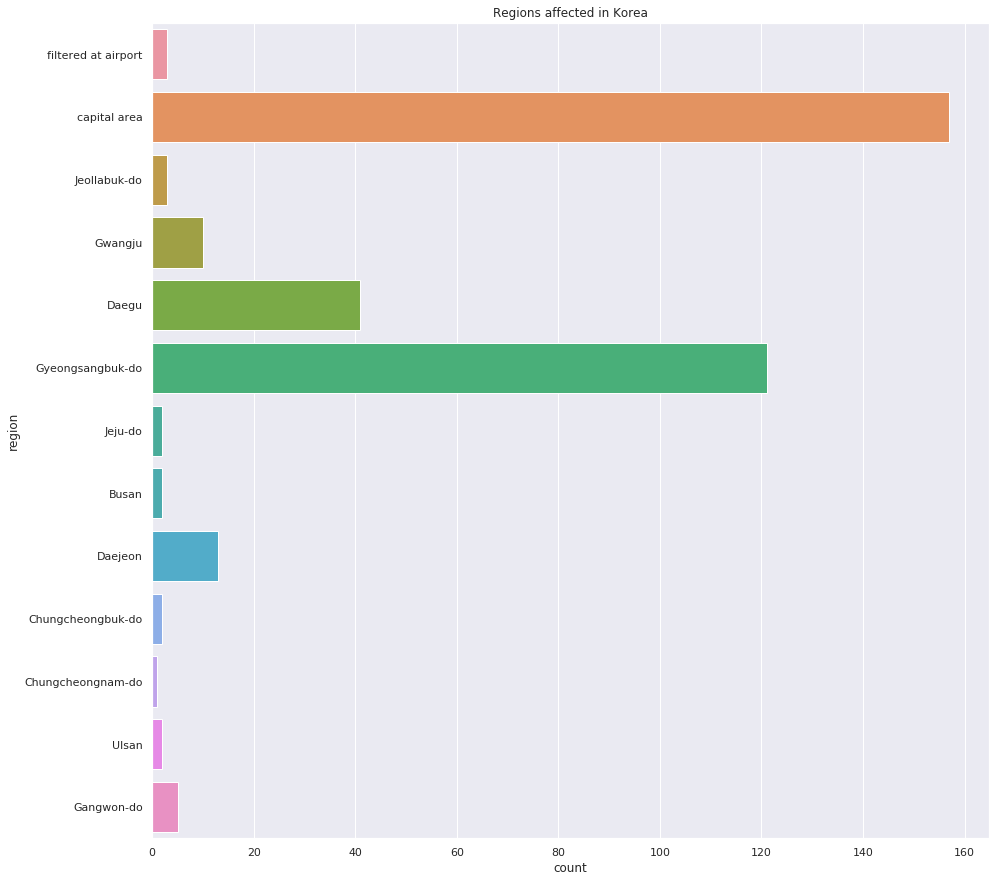

In [29]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(
    y=patient['region'].loc[
        (patient['country']=="Korea")],

).set_title('Regions affected in Korea')

In [30]:
region_korea = [x for x in patient['region'].loc[patient['country']=="Korea"].unique()]
size_region_korea = [len(patient['region'].loc[(patient['region']==region)])
                     for region in region_korea]

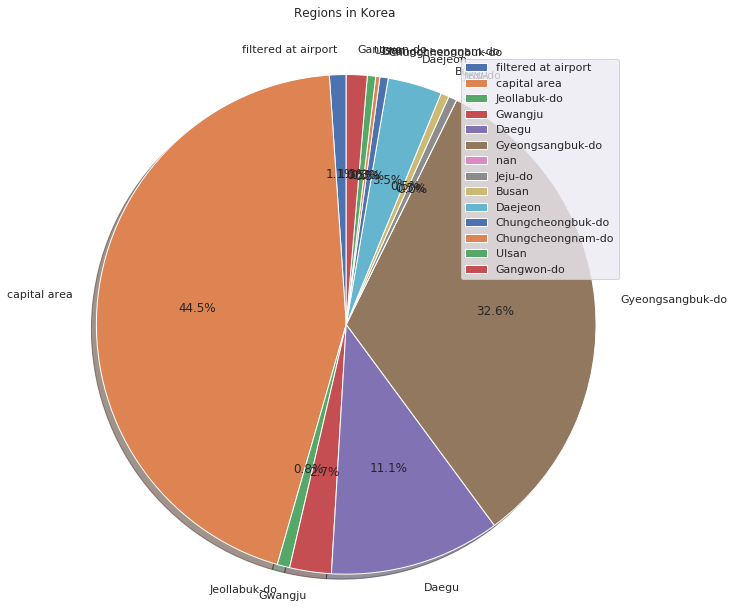

In [31]:
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(size_region_korea,labels=region_korea, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend()
ax1.set_title('Regions in Korea\n\n')
plt.show()

<h3>Reasons for infection in Korea

Text(0.5, 1.0, 'Infection reason in Korea')

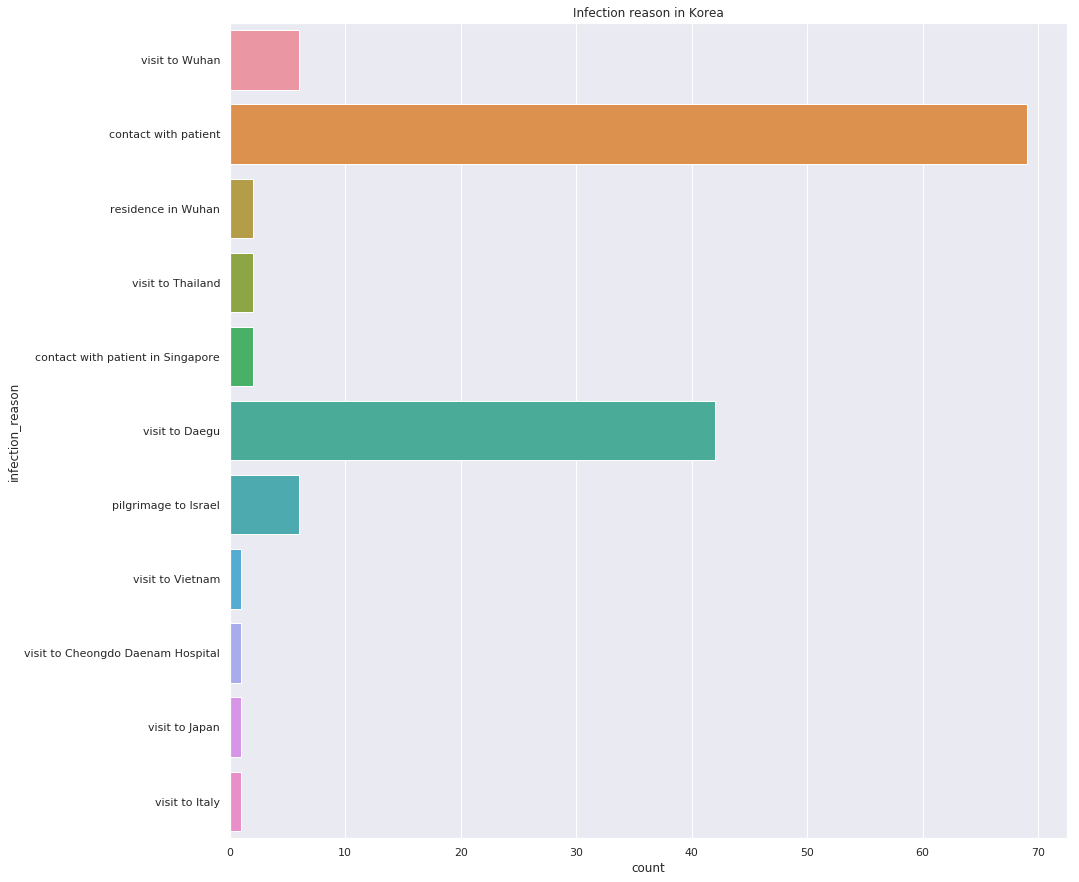

In [32]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(
    y=patient['infection_reason'].loc[
        (patient['country']=="Korea")],

).set_title('Infection reason in Korea')

In [33]:
infection_reason = [x for x in patient['infection_reason'].loc[patient['country']=="Korea"].unique()]
size_infection_korea = [len(patient['infection_reason'].loc[(patient['infection_reason']==infection_reason)])
                     for infection_reason in infection_reason]

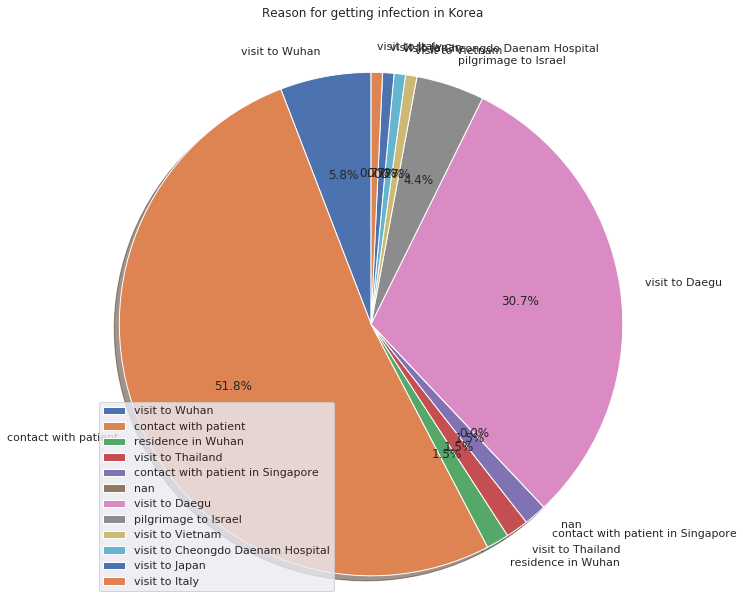

In [34]:
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(size_infection_korea,labels=infection_reason, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend()
ax1.set_title('Reason for getting infection in Korea\n\n')
plt.show()

Text(0.5, 1.0, 'Confirmed dates in Korea')

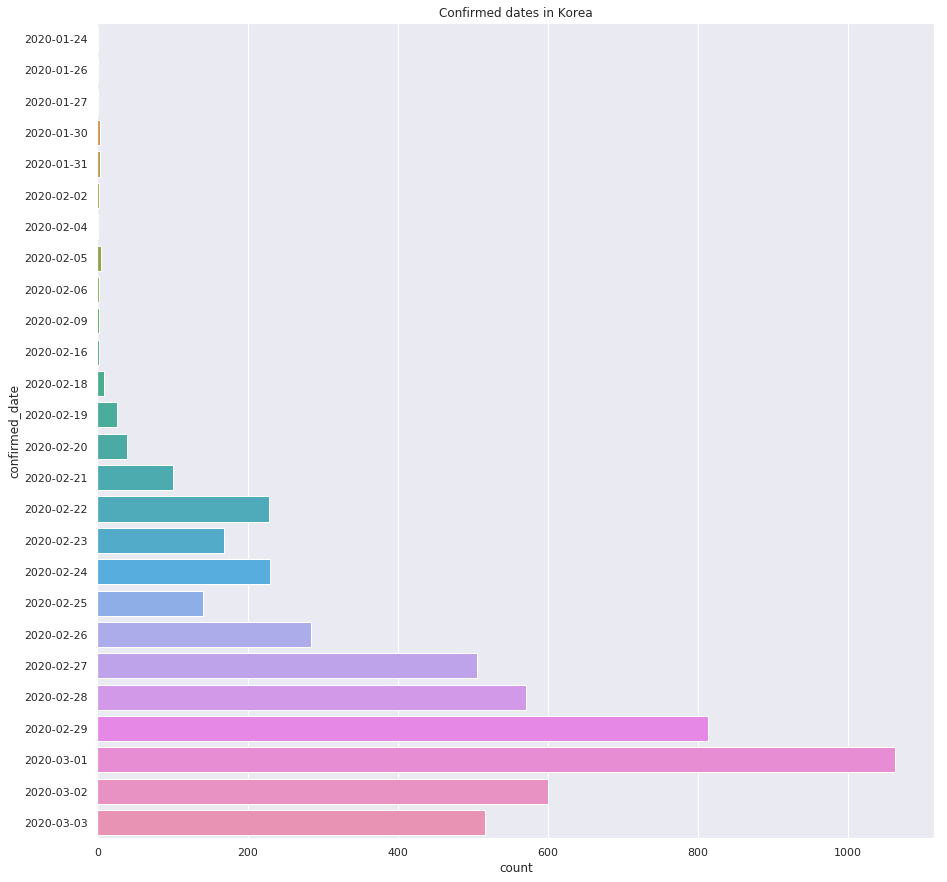

In [35]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(
    y=patient['confirmed_date'].loc[
        (patient['country']=="Korea")],

).set_title('Confirmed dates in Korea')

In Korea , the confirmed cases is much higher than both of the countries.

On 2020-03-01 , the confirmed cases was the highest about 1000+ and has reduced after.


<H3>Summary</H3>

We see that the most common form of getting infected is mainly by contact.

So guys please take the necessary precautions , as this easily spreadable , and take care of yourself! 

Thanks!:)